In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Membuat dataset contoh
n_samples = 300
n_features = 2
centers = 3
cluster_std = 0.60
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=0)

In [5]:
# Membuat model DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

In [6]:
# Melakukan fitting model ke data
dbscan.fit(X)

DBSCAN(eps=0.3)

In [7]:
# Mendapatkan label dari setiap titik data
labels = dbscan.labels_

In [8]:
# Mendapatkan core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

In [9]:
# Menghitung jumlah cluster
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

Number of clusters: 5


Number of clusters: 5


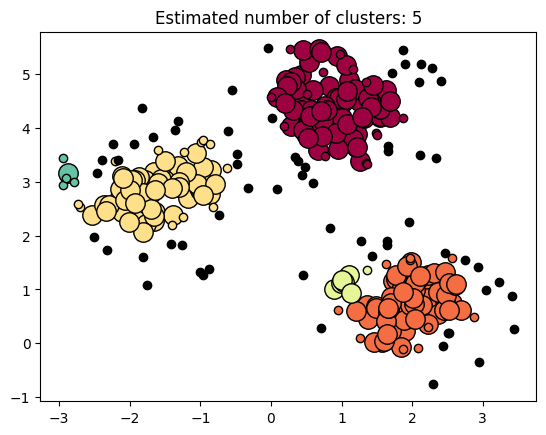

In [1]:
# Plot hasil clustering
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters}')
plt.show()
